In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
df = pd.read_excel("Database.xlsx")
index = ["Treatment name","Treatment type1","n randomized in this arm","Total sample size"]
data = pd.DataFrame(df,columns = index)[(df["Treatment type1"] !='*') & (df["n randomized in this arm"] != "*")]
data.index = range(len(data))
values = [[],[]]
for i in [0,1] : 
    data[index[i]] = data[index[i]].str.lower()
    data[index[i]] = data[index[i]].str.replace(', ','+')
    values[i] = data[index[i]].unique()
print(data.shape)

(462, 4)


In [4]:
all_values = values[0]
for temp in values[1] : 
    if not temp in all_values :
        all_values = np.append(all_values, [temp], axis = 0)
l = len(all_values)

In [5]:
a = str(data.loc[1,index[1]])
b = np.where(all_values == a)

In [17]:
patients_nb = np.eye(l)
for i in range(0,462) :
    treatmt1 = data.loc[i,index[0]]
    po1 = np.where(all_values == treatmt1)
    treatmt2 = data.loc[i,index[1]]
    po2 = np.where(all_values == treatmt2)
    #nb = data.loc[i,index[2]]
    patients_nb[po1,po2] = patients_nb[po1,po2] + 1
patients_nb = patients_nb + np.transpose(patients_nb)

239


In [152]:
#on ajoute une ligne des indices correspondants avant de supprimer tous les 0 pour que les indices ne confondent pas 
temp1 = np.arange(239)
patients_nb_ind = np.vstack((patients_nb,temp1))
temp2 = np.transpose(np.arange(239))
temp2 = np.hstack((temp2,0))
patients_nb_ind = np.column_stack((patients_nb_ind,temp2))
patients_nb_ind = patients_nb_ind - 2*np.eye(240)
patients_np_ind = np.delete(patients_nb_ind,[1,2],axis=0)
#print(patients_nb_ind)
#on enlève tous les 0
ind = []
for i in range(0,239) : 
    #print(patients_nb_ind[i])
    #print(np.count_nonzero(patients_nb_ind[i]))
    if np.count_nonzero(patients_nb_ind[i]) <= 2 :
        ind.append(i)
patients_np_ind = np.delete(patients_nb_ind,ind,axis=0)

        



240


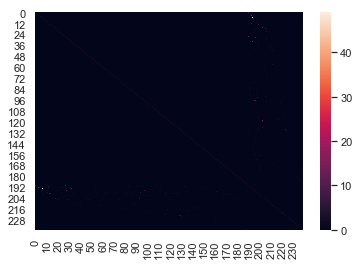

In [136]:
sns.set()
np.random.seed(0)
ax = sns.heatmap(patients_nb)
plt.savefig('cluster.tif',dpi = 300)
plt.show()

In [154]:
a = np.eye(1,5)
a = np.delete(a[0],[1,5,2],axis = 0)
print(a.shape)

(3,)


/Users/emiliekong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [128]:
print(patients_nb.shape)

(239, 239)
